In [1]:
import numpy
import gzip
import numpy as np
import pandas as pd
import sys, glob
import urllib3
import h5py
import cdsapi, zipfile, os, time
import warnings
import shutil
import xarray
from datetime import date
warnings.filterwarnings('ignore')
import pycountry
import json

sys.path.append(os.path.expanduser("~")+'/CEUAS/CEUAS/public/cds-backend/code/')
import cds_eua4 as eua
sys.path.append(os.path.expanduser("~")+'/uvpy/')
import uvfunctions as uvf
import uvplot as uvp
import uvtests as uvt

import matplotlib
import matplotlib.pylab as plt
import matplotlib.pyplot as maplt
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['figure.figsize'] = (20, 10)
font = {'size'   : 20}
matplotlib.rc('font', **font)

from ipywidgets import IntProgress
from IPython.display import display
from IPython.display import Image

no config found


# Trends in relative humidity

In [2]:
import pickle
sys.path.append(os.getcwd()+'/../resort/rasotools-master/')
import rasotools
def show_trend_map(file,label, c_bar, multiplier = 1, c_bar_red_top = True):
    plev = file.split('_')[-5]
    sdate = file.split('_')[-4]
    edate = file.split('_')[-3]
    good_results = {}
    good_results['lat'] = []
    good_results['lon'] = []
    good_results['st'] = []
    good_results['at'] = []
    good_results['label'] = []
    
    if c_bar_red_top:
        cs = 'RdBu_r'
    else:
        cs = 'RdBu'
    
    results = pickle.load(open(file, 'rb'))
    for i in results:
        badflag = 0
        for j in i:
            try:
                if np.isnan(j):
                    badflag = 1
            except:
                pass
        if badflag == 0:
            good_results['lat'].append(i[1])
            good_results['lon'].append(i[2])
            good_results['st'].append(i[3][0])
            good_results['at'].append(i[4][0])
            good_results['label'].append(i[0].split('/')[-1].split('_')[0])
    da = pd.DataFrame.from_dict(good_results)

    statnum = len(da)

    a = rasotools.plot._helpers.cost(np.asarray(da.lon), np.asarray(da.lat), np.asarray(da.st))
    cost = np.sum(a)/len(a)
    fig1 = uvp.world_map_plot(da.st, da.lat, da.lon, da.label, label + ' trend unadjusted <br> '+str(plev)+'_'+sdate+'_'+edate+' <br> heterogeneity cost: ' + str(cost), show = False, mid = True, cbar_title=c_bar, cs=cs) # 

    img = fig1.to_image(format="png")
    display(Image(img) )

    a = rasotools.plot._helpers.cost(np.asarray(da.lon), np.asarray(da.lat), np.asarray(da['at']))
    cost = np.sum(a)/len(a)
    fig2 = uvp.world_map_plot(da['at'], da.lat, da.lon, da.label, label + ' trend adjusted <br> '+str(plev)+'_'+sdate+'_'+edate+' <br> heterogeneity cost: ' + str(cost), show = False, mid = True, cbar_title=c_bar, cs=cs) # 


    img = fig2.to_image(format="png")
    display(Image(img))


In [13]:
import pickle
sys.path.append(os.getcwd()+'/../resort/rasotools-master/')
import rasotools
def show_trend_diff_map(file,label, c_bar, multiplier = 1, c_bar_red_top = True):
    plev = file.split('_')[-5]
    sdate = file.split('_')[-4]
    edate = file.split('_')[-3]
    good_results = {}
    good_results['lat'] = []
    good_results['lon'] = []
    good_results['st'] = []
    good_results['at'] = []
    good_results['label'] = []
    
    if c_bar_red_top:
        cs = 'RdBu_r'
    else:
        cs = 'RdBu'
    
    results = pickle.load(open(file, 'rb'))
    for i in results:
        badflag = 0
        for j in i:
            try:
                if np.isnan(j):
                    badflag = 1
            except:
                pass
        if badflag == 0:
            good_results['lat'].append(i[1])
            good_results['lon'].append(i[2])
            good_results['st'].append(i[3][0])
            good_results['at'].append(i[4][0])
            good_results['label'].append(i[0].split('/')[-1].split('_')[0])
    da = pd.DataFrame.from_dict(good_results)
    da['diff'] = da['at'] - da['st']
    statnum = len(da)

    a = rasotools.plot._helpers.cost(np.asarray(da.lon), np.asarray(da.lat), np.asarray(da['diff']))
    cost = np.sum(a)/len(a)
    fig1 = uvp.world_map_plot(da['diff'], da.lat, da.lon, da.label, label + ' trend adjusted - unadjusted <br> '+str(plev)+'_'+sdate+'_'+edate+' <br> heterogeneity cost: ' + str(cost), show = False, mid = True, cbar_title=c_bar, cs=cs) # 

    img = fig1.to_image(format="png")
    display(Image(img) )


['polyfit_trends_relative_humidity_300hPa_1993-01-01_2022-12-31_Trend_20230817.p', 'polyfit_trends_relative_humidity_300hPa_1973-01-01_2002-12-31_Trend_20230817.p']


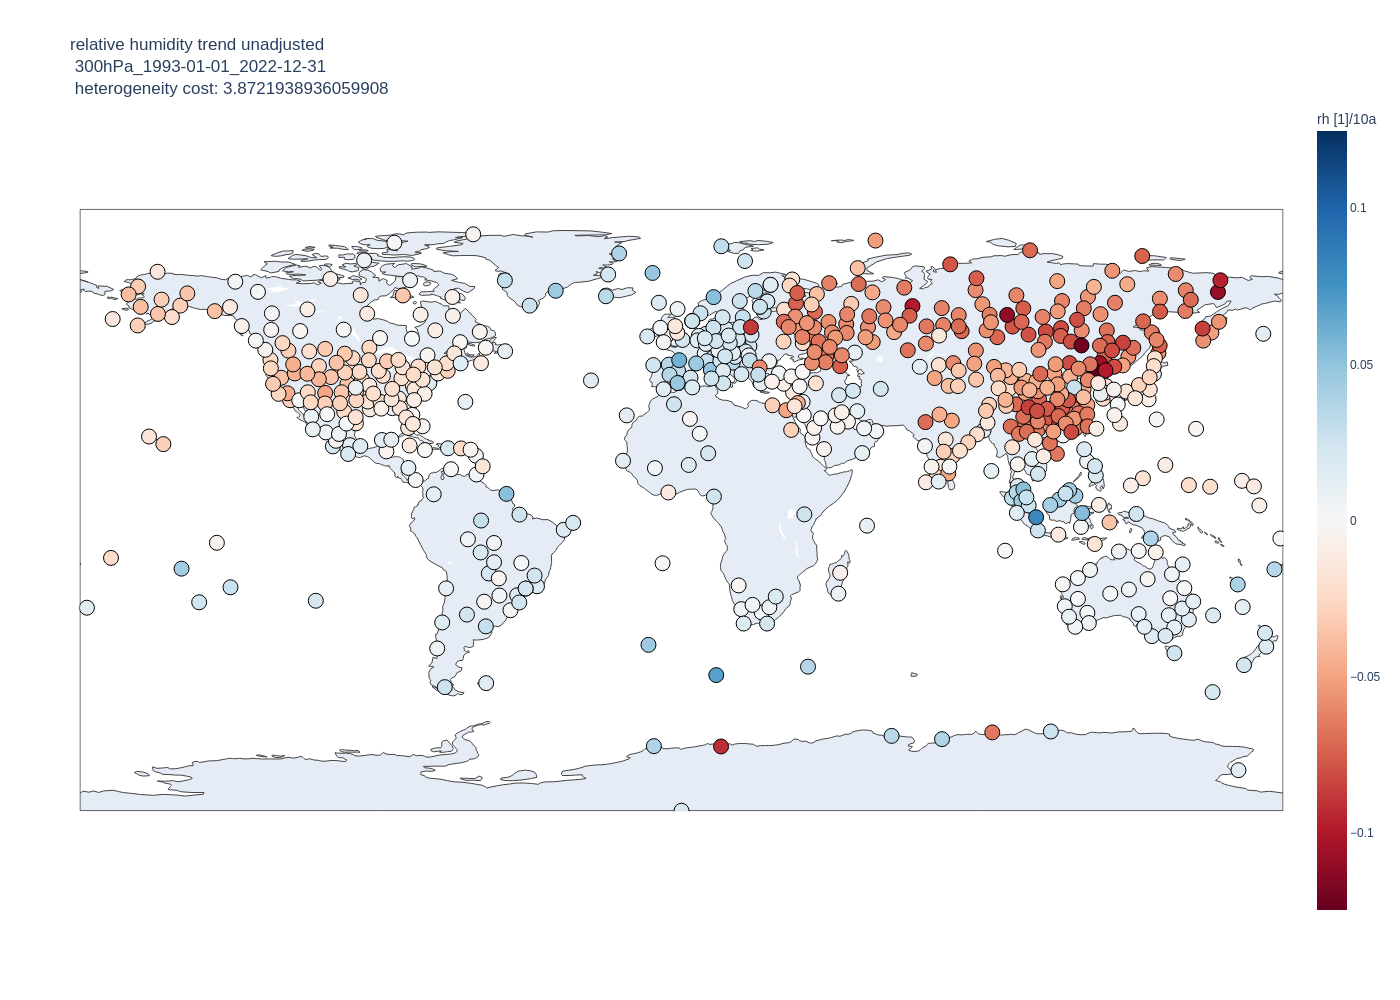

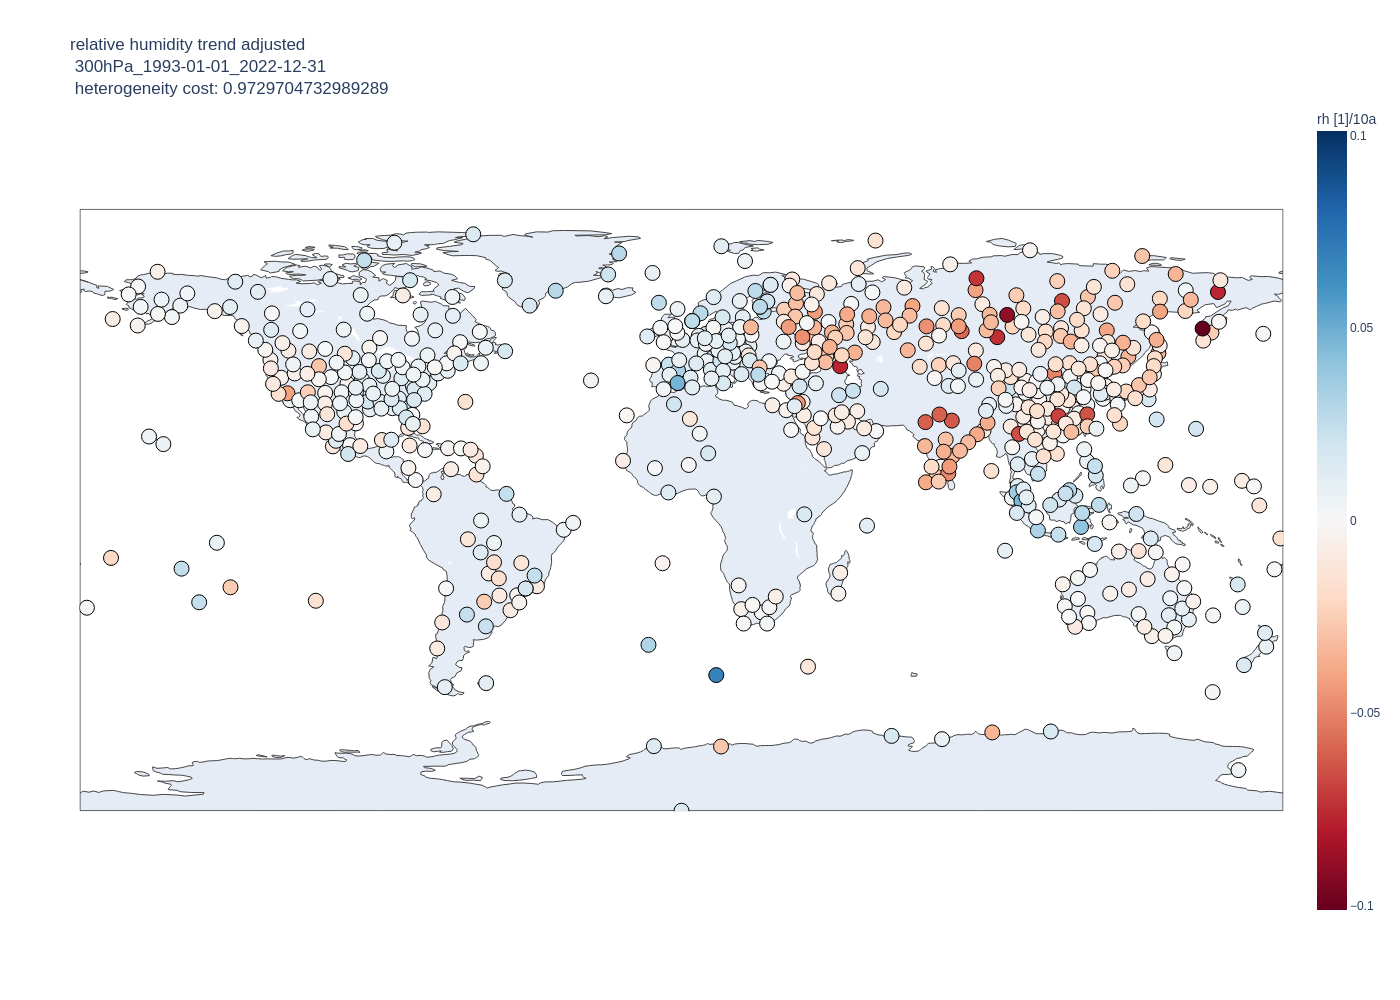

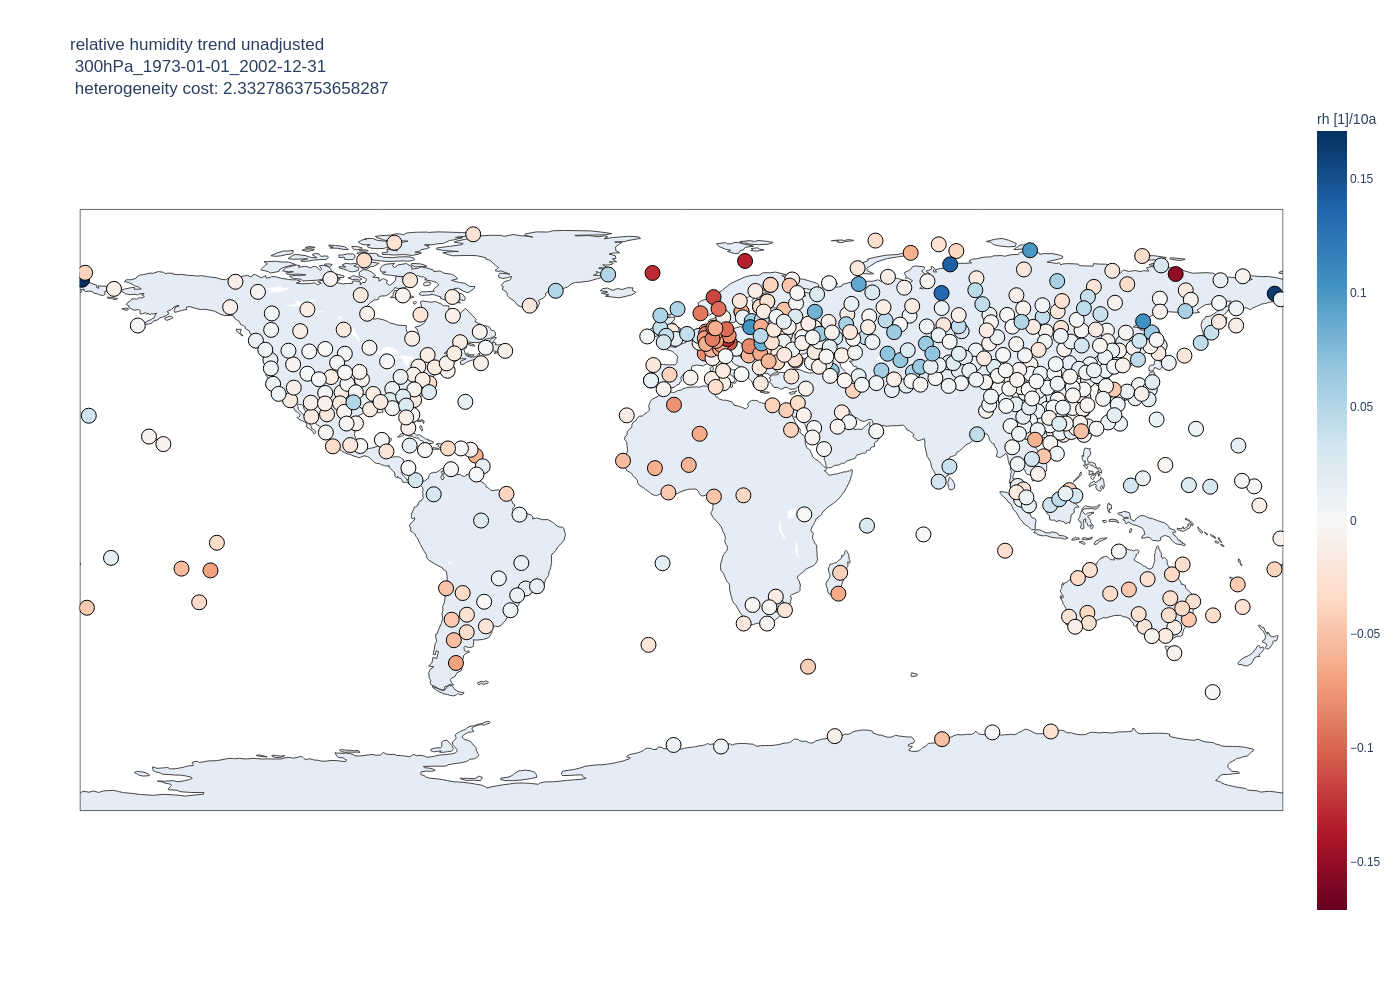

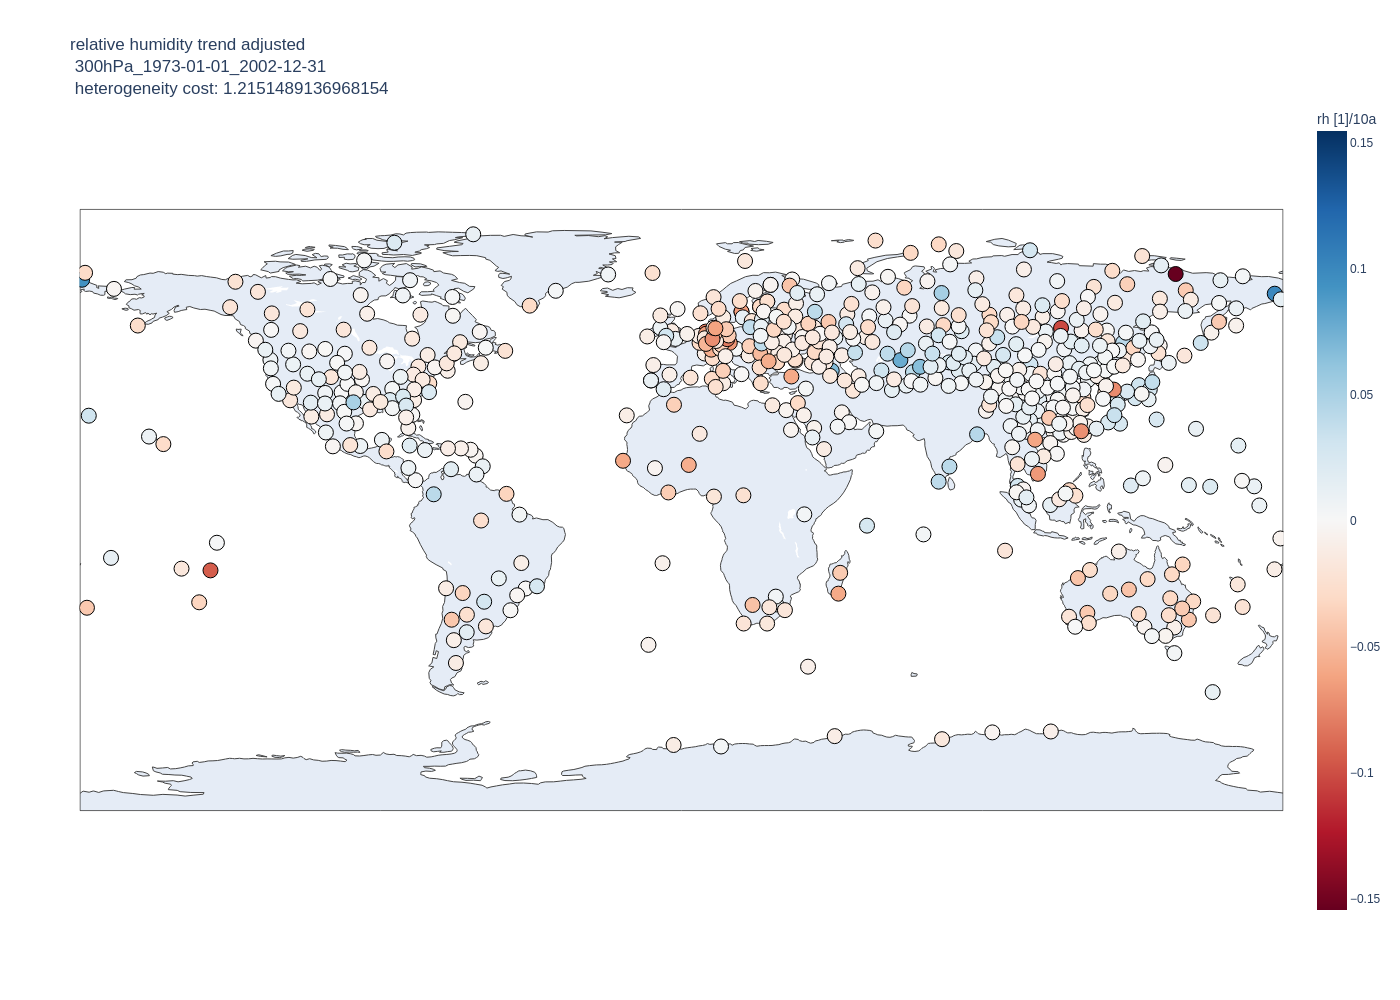

In [14]:
files = glob.glob('polyfit_trends_relative_humidity_300*20230817.p')
print(files)
label = 'relative humidity'
c_bar = 'rh [1]/10a'
for i in files:
    show_trend_map(i, label, c_bar, c_bar_red_top=False)

['polyfit_trends_relative_humidity_500hPa_1993-01-01_2022-12-31_Trend_20230817.p', 'polyfit_trends_relative_humidity_500hPa_1973-01-01_2002-12-31_Trend_20230817.p']


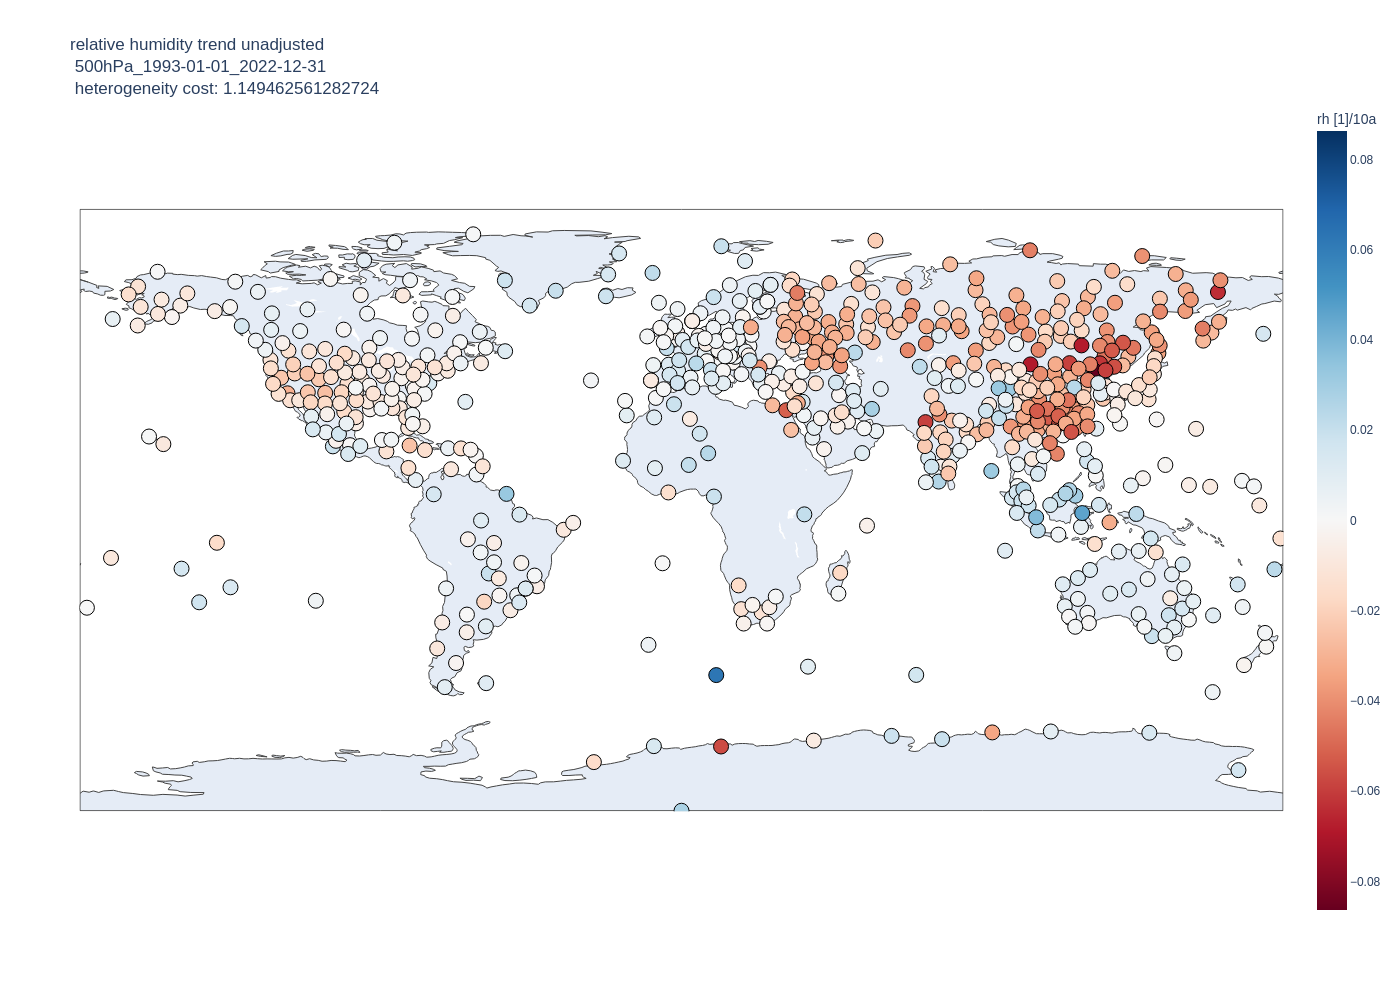

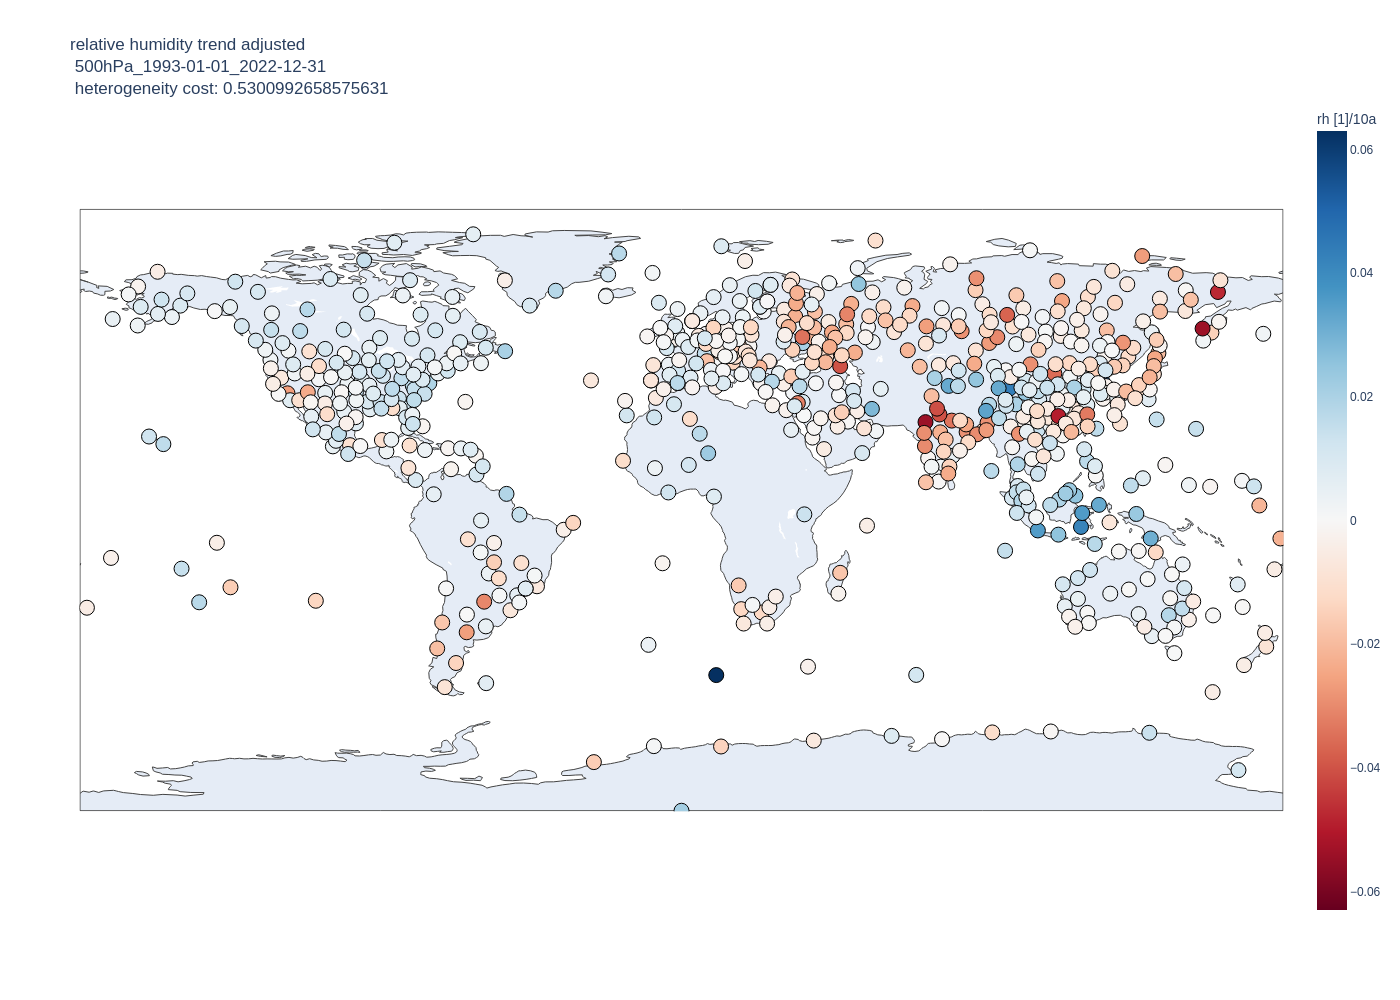

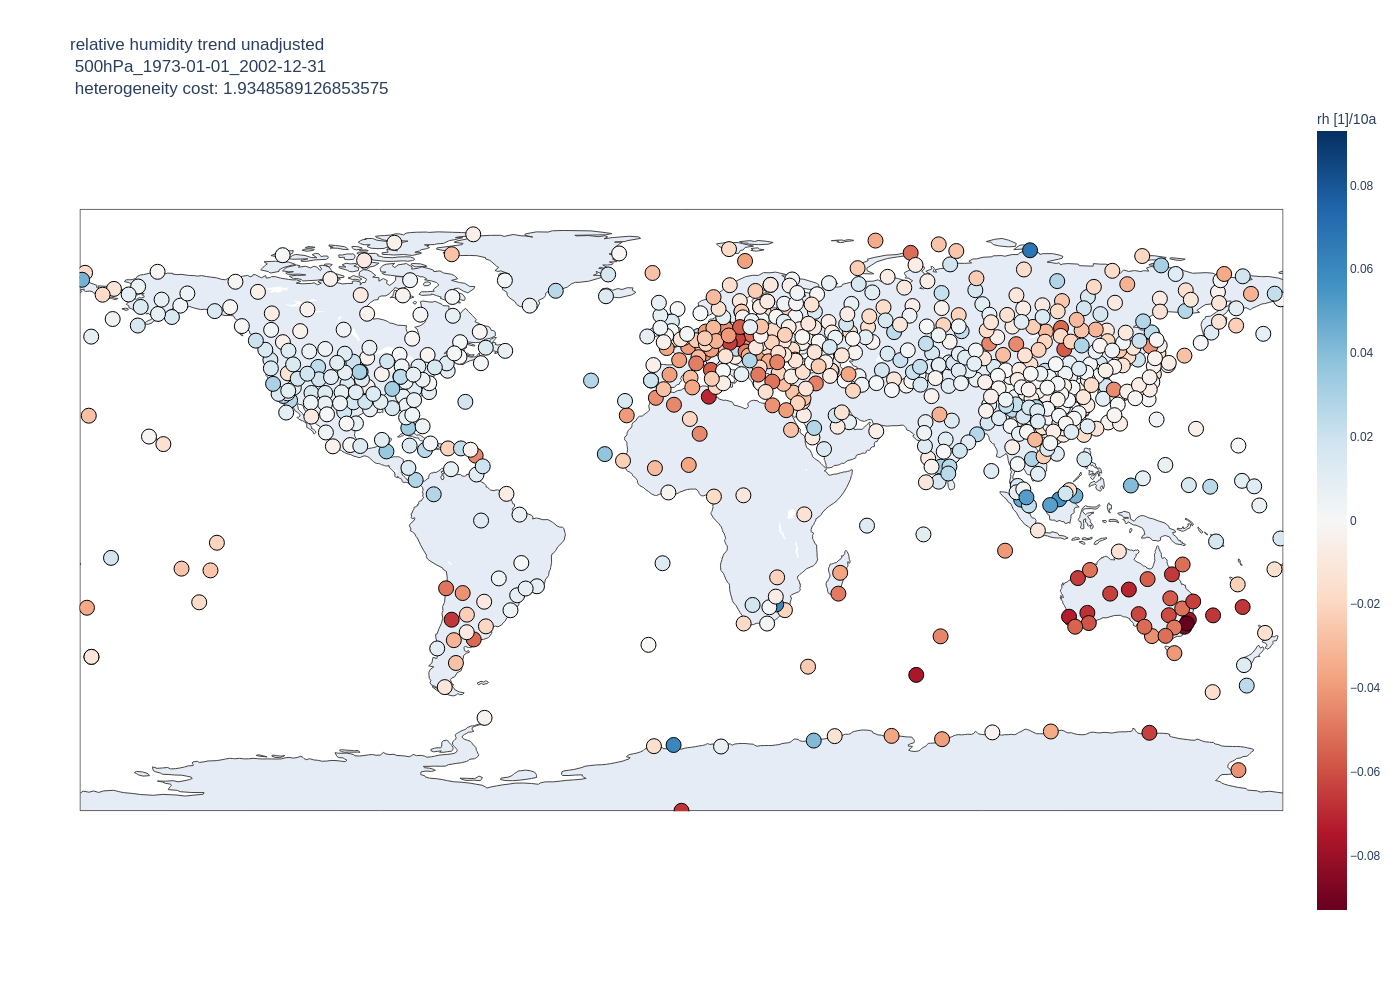

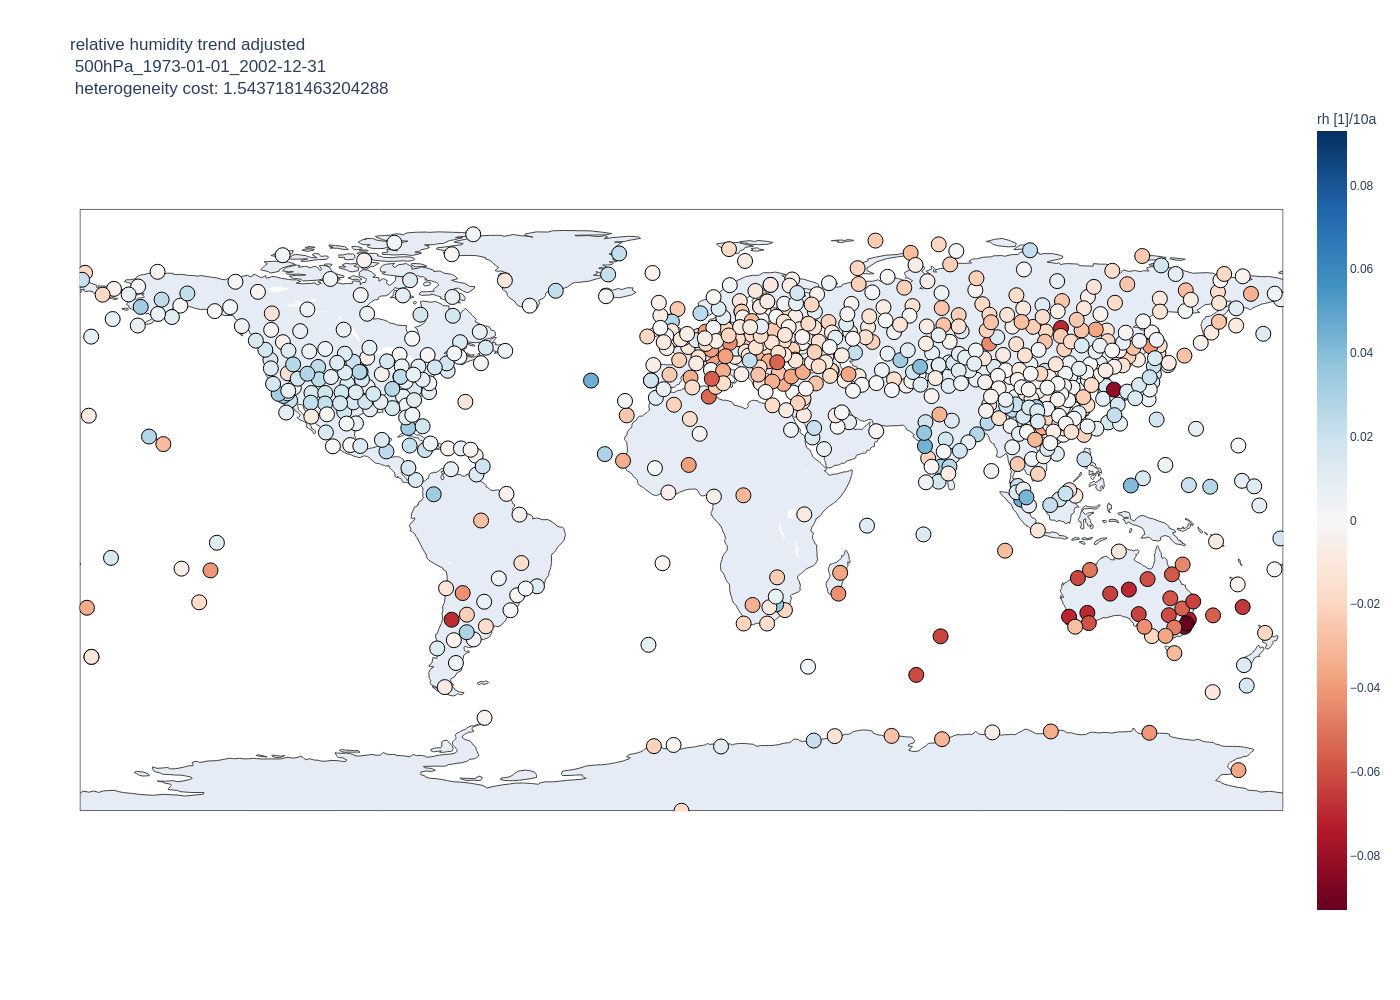

In [6]:
files = glob.glob('polyfit_trends_relative_humidity_500*20230817.p')
print(files)
label = 'relative humidity'
c_bar = 'rh [1]/10a'
for i in files:
    show_trend_map(i, label, c_bar, c_bar_red_top=False)

['polyfit_trends_relative_humidity_700hPa_1958-01-01_1987-12-31_Trend_20230817.p', 'polyfit_trends_relative_humidity_700hPa_1993-01-01_2022-12-31_Trend_20230817.p', 'polyfit_trends_relative_humidity_700hPa_1973-01-01_2002-12-31_Trend_20230817.p']


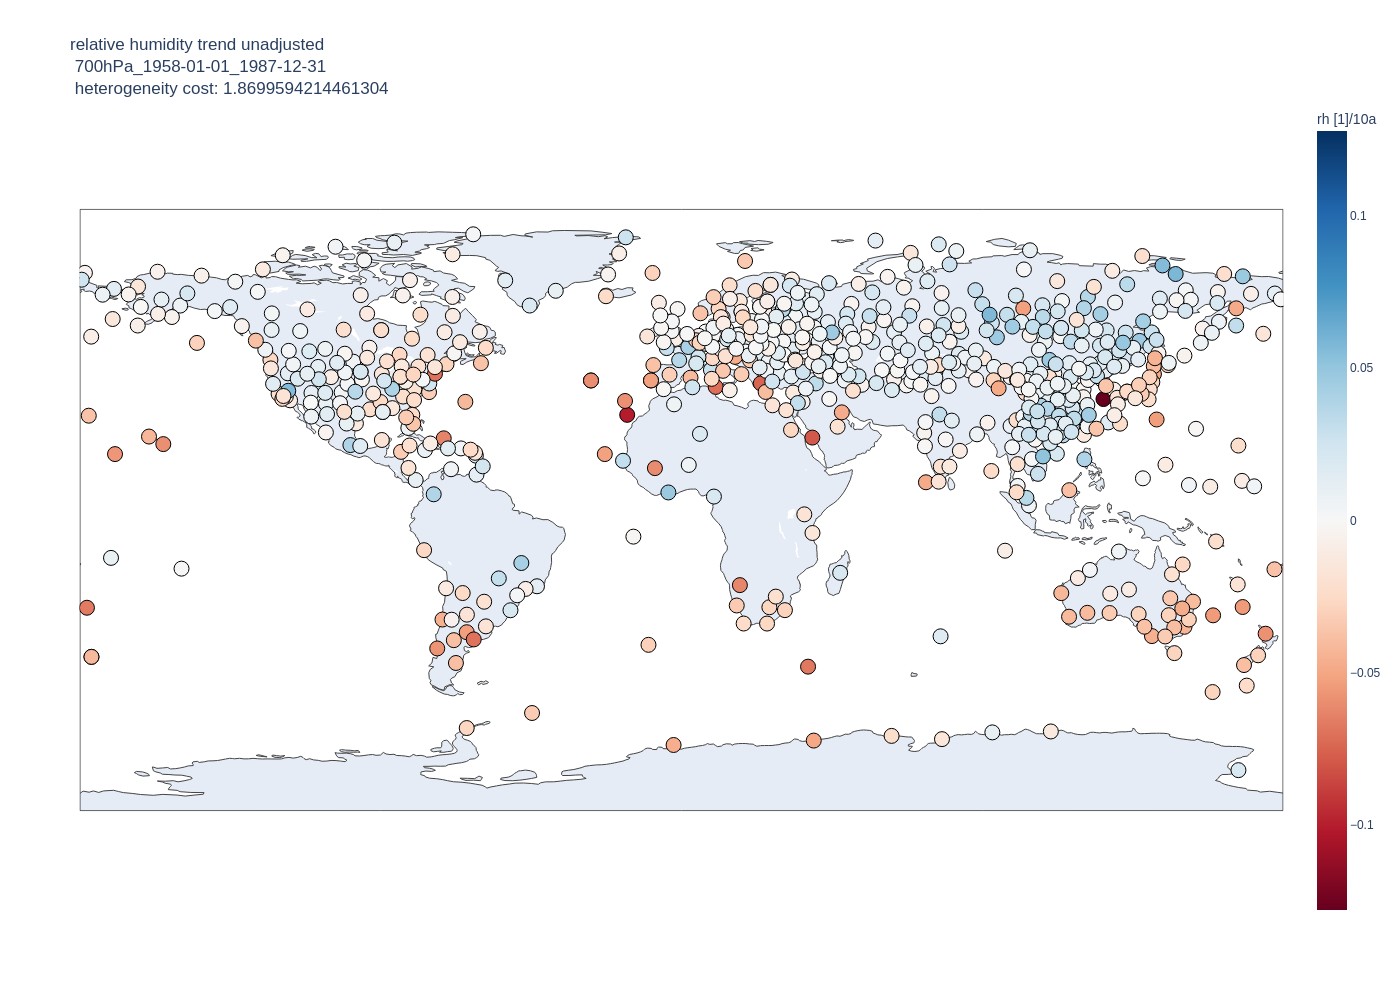

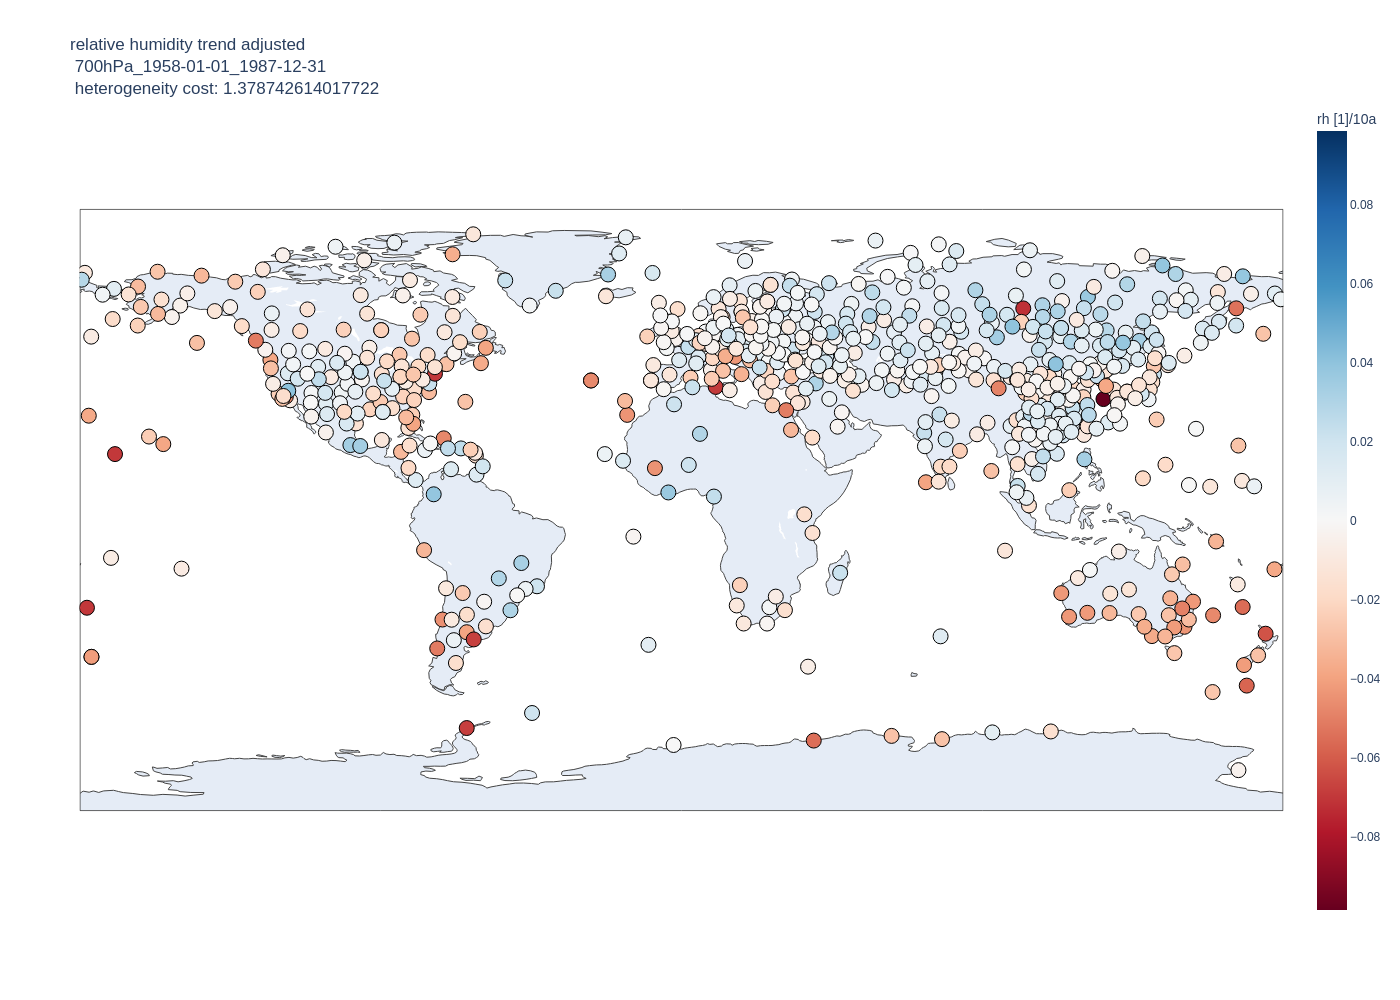

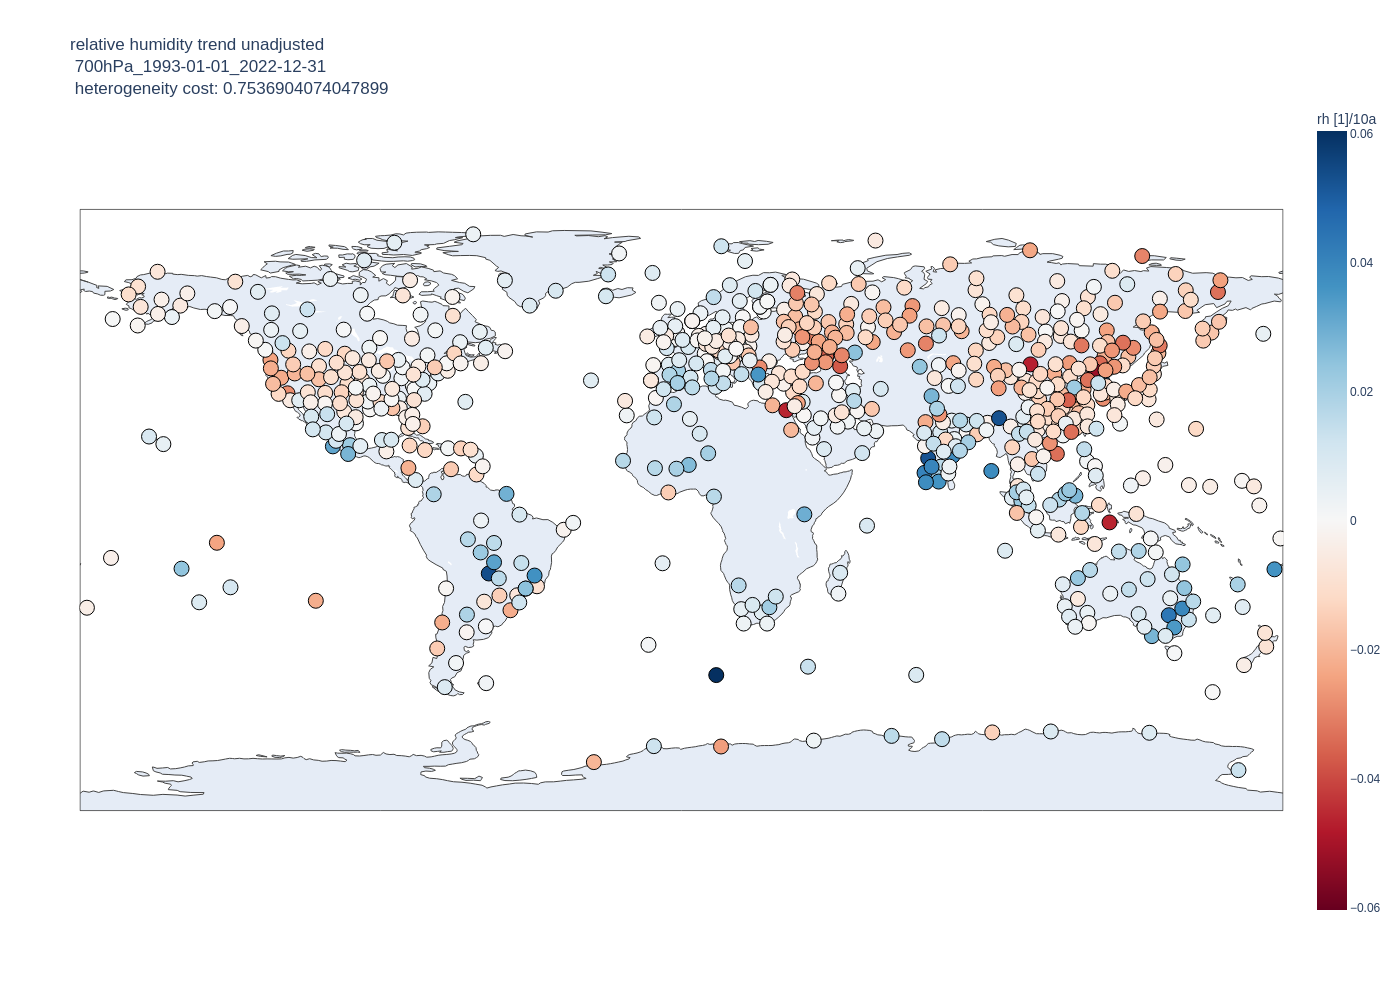

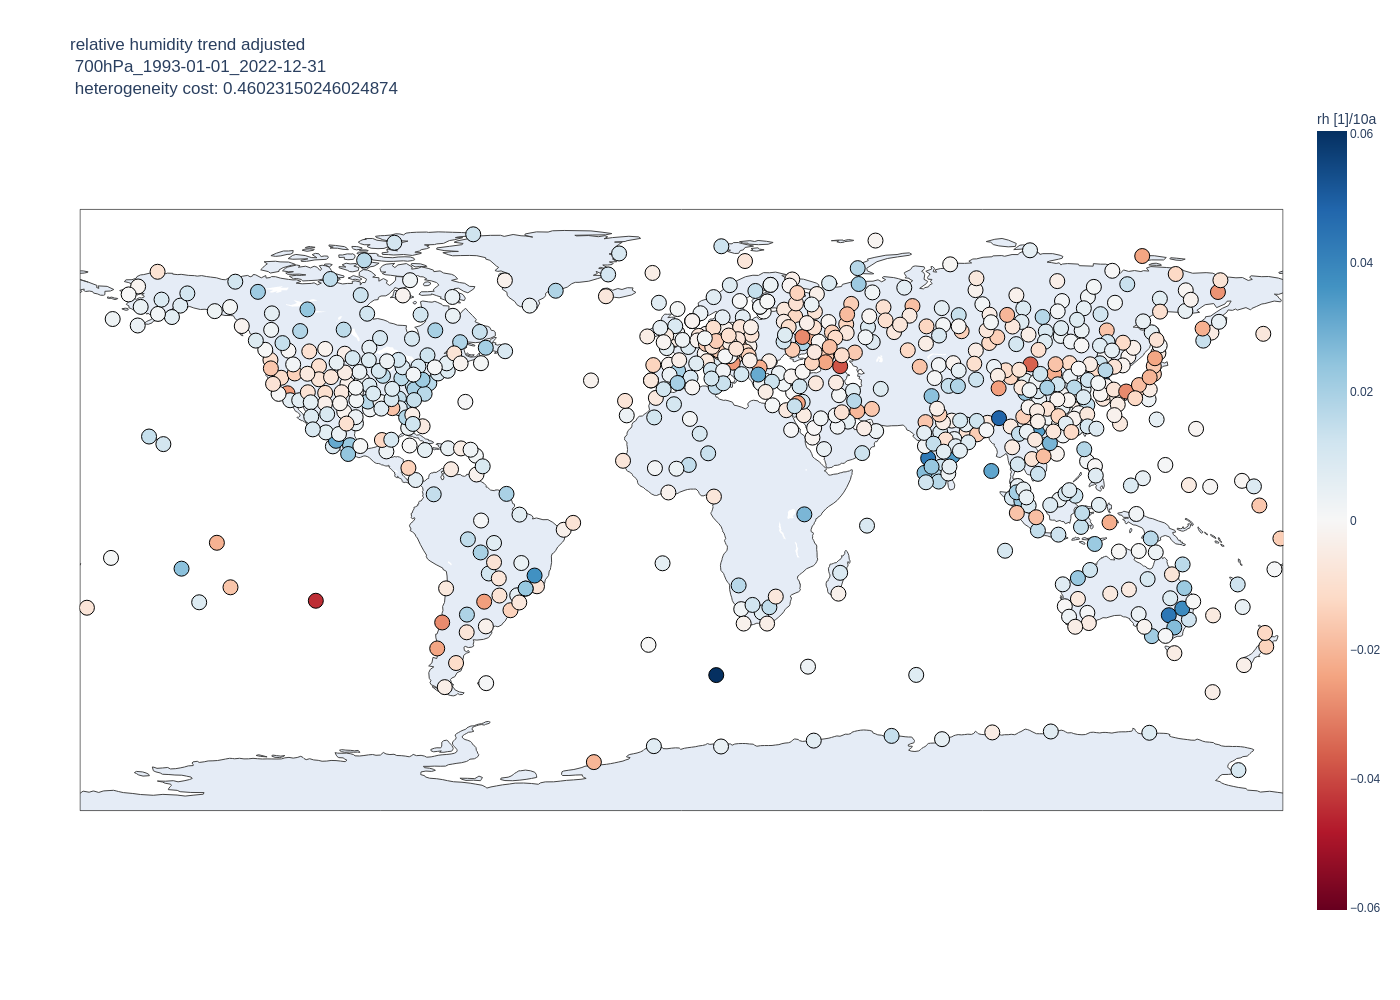

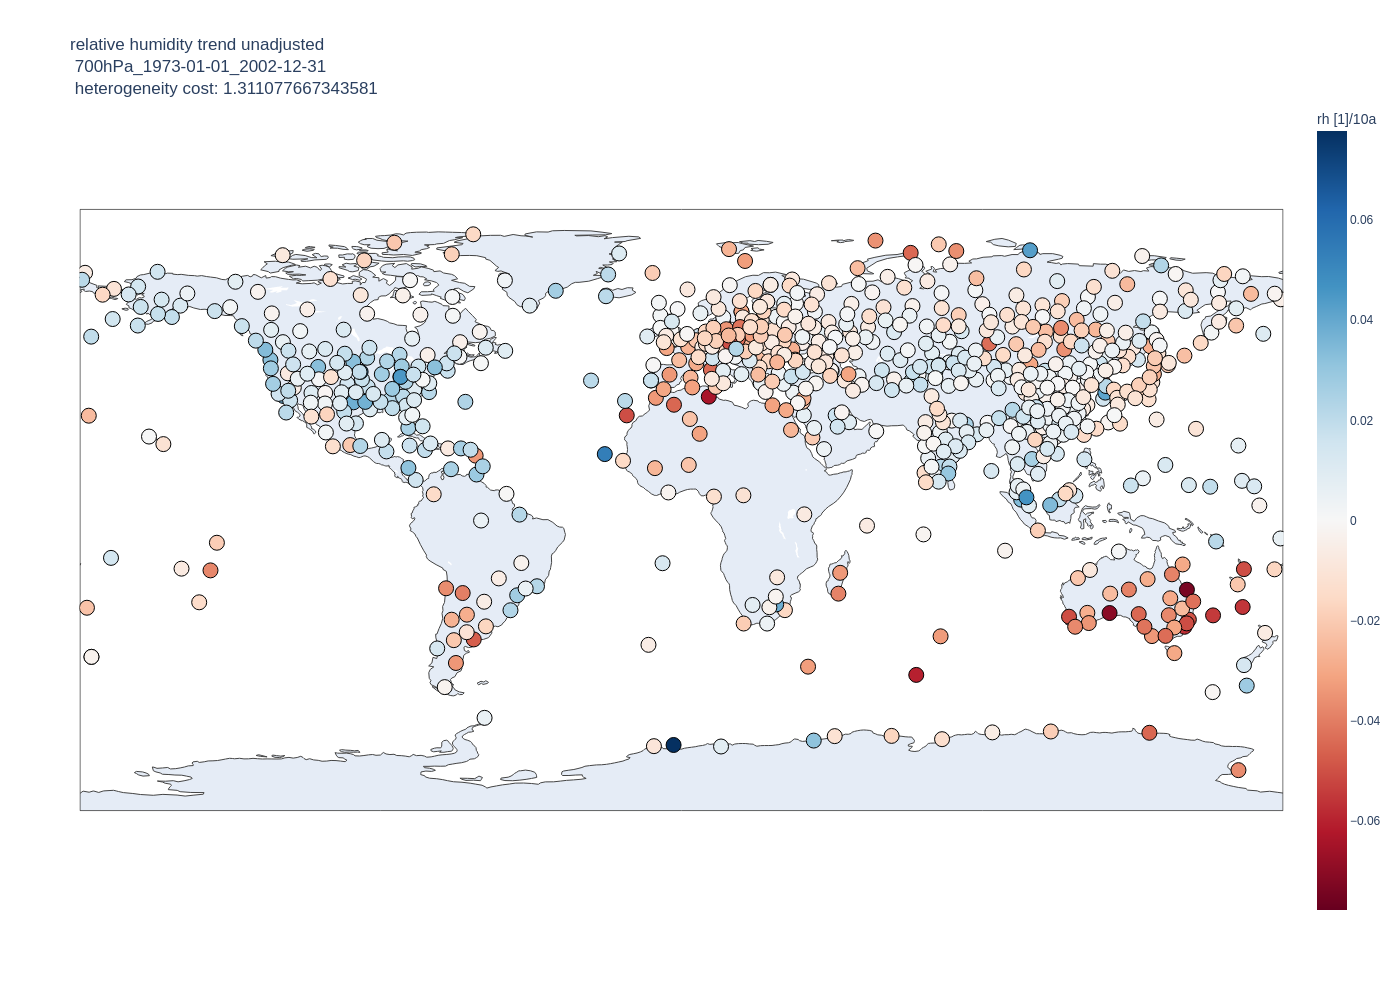

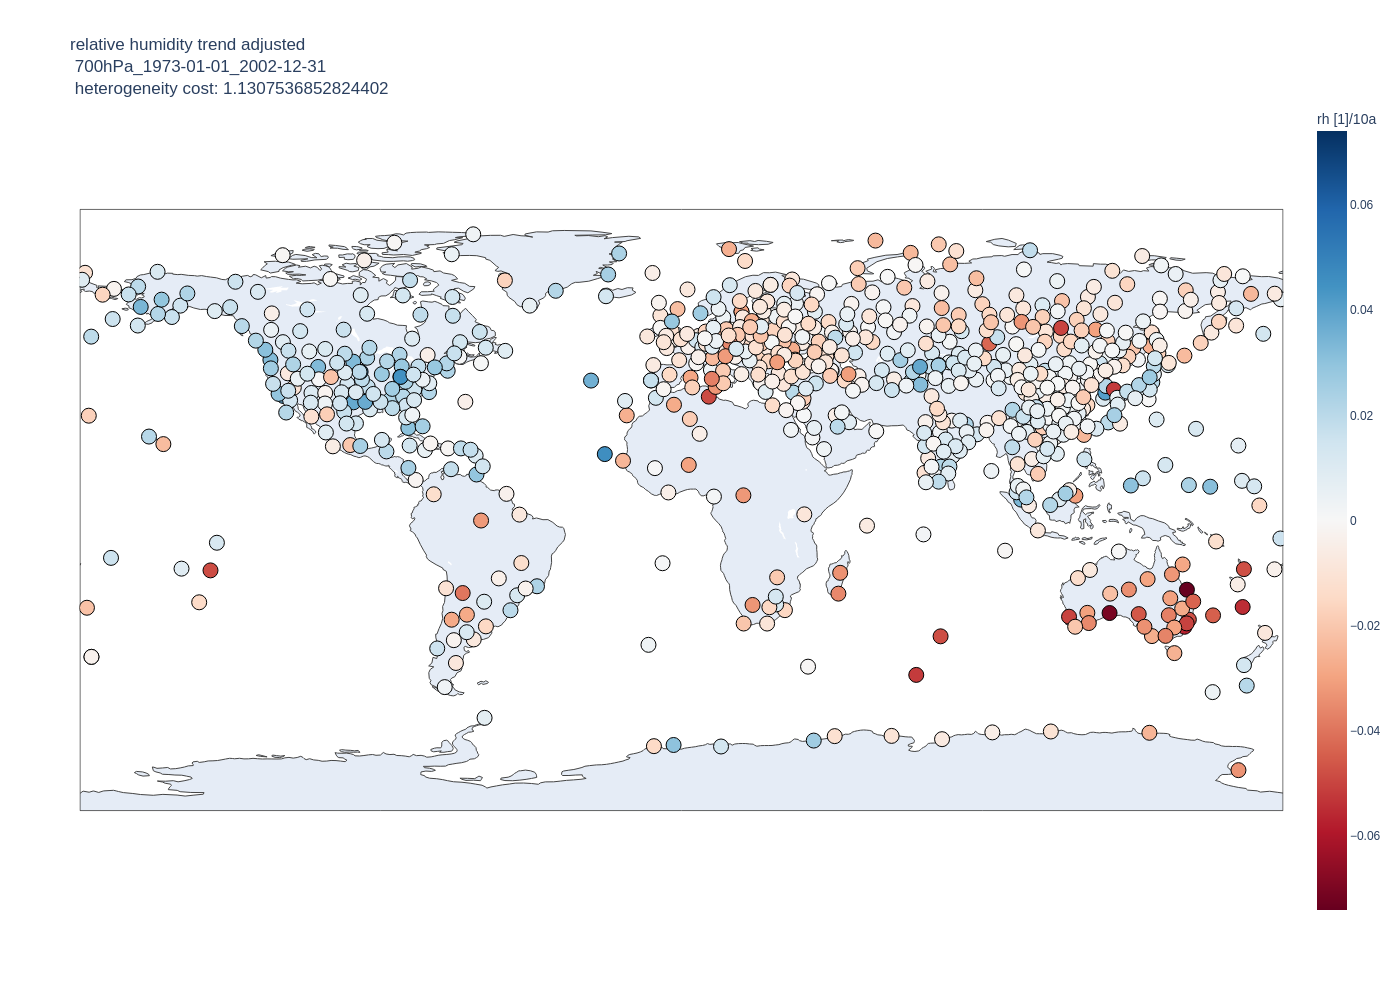

In [7]:
files = glob.glob('polyfit_trends_relative_humidity_700*20230817.p')
print(files)
label = 'relative humidity'
c_bar = 'rh [1]/10a'
for i in files:
    show_trend_map(i, label, c_bar, c_bar_red_top=False)